In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 94s 1us/step


In [63]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [9]:
x_test.shape

(10000, 32, 32, 3)

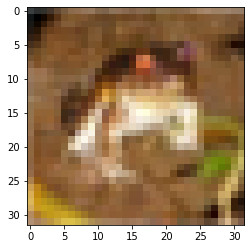

In [10]:
plt.imshow(x_train[0])# a frog

In [11]:
x_train.max()

255

In [12]:
x_train.min()

0

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train.max()

1.0

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10) #10 is 10 classes
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# model.add(Dense(1024,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop= EarlyStopping(monitor='val_loss',patience=10)

In [25]:
model.fit(x_train,y_cat_train,epochs=200,batch_size=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop],verbose=1)

Epoch 1/200
500/500 [==============================] - 56s 113ms/step - loss: 1.6432 - accuracy: 0.4156 - val_loss: 1.3996 - val_accuracy: 0.4939
Epoch 2/200
500/500 [==============================] - 56s 111ms/step - loss: 1.2688 - accuracy: 0.5546 - val_loss: 1.1658 - val_accuracy: 0.5853
Epoch 3/200
500/500 [==============================] - 55s 111ms/step - loss: 1.0981 - accuracy: 0.6169 - val_loss: 1.1336 - val_accuracy: 0.6083
Epoch 4/200
500/500 [==============================] - 57s 115ms/step - loss: 0.9732 - accuracy: 0.6616 - val_loss: 1.0030 - val_accuracy: 0.6504
Epoch 5/200
500/500 [==============================] - 60s 119ms/step - loss: 0.8684 - accuracy: 0.6978 - val_loss: 0.9987 - val_accuracy: 0.6634
Epoch 6/200
500/500 [==============================] - 56s 111ms/step - loss: 0.7770 - accuracy: 0.7332 - val_loss: 0.9511 - val_accuracy: 0.6742
Epoch 7/200
500/500 [==============================] - 54s 109ms/step - loss: 0.6842 - accuracy: 0.7626 - val_loss: 0.9423 -

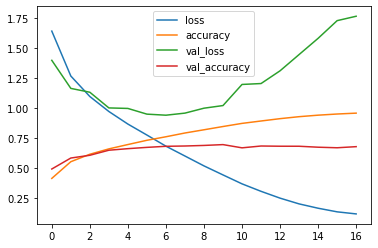

In [26]:
pd.DataFrame(model.history.history).plot()

In [27]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [42]:
y_test[20]

array([7], dtype=uint8)

In [53]:
my_image = x_test[1000]

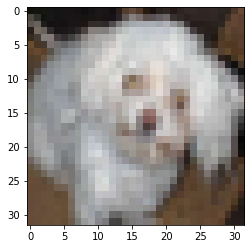

In [54]:
plt.imshow(my_image)


In [55]:
model.predict_classes(my_image.reshape(1,32,32,3))#1 image,32,32 height and width,3 color channel(RGB)

array([5], dtype=int64)

In [57]:
a=y_test[1000]#Correct class was predicted

In [58]:
a[0]

5

In [60]:
results=[
'airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',]

In [61]:
answer=results[a[0]]

In [62]:
answer

'dog'